In [35]:
from datetime import datetime
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

In [2]:
tokenizer = AutoTokenizer.from_pretrained('mrm8488/bert-mini-finetuned-age_news-classification', add_special_tokens=True, model_max_length=512, truncation=True, padding="max_length")

In [5]:
classifier_pipe = pipeline("text-classification", model = 'mrm8488/bert-mini-finetuned-age_news-classification', tokenizer=tokenizer)

In [6]:
tokenizer1 = AutoTokenizer.from_pretrained('siebert/sentiment-roberta-large-english', add_special_tokens=True, model_max_length=512, truncation=True, padding="max_length")

In [7]:
sentiment_analyser = pipeline("sentiment-analysis",model="siebert/sentiment-roberta-large-english", tokenizer=tokenizer1)

# IN

## Categorise News Articles

In [8]:
in_total = pd.read_json('c4_reuters_IN.json').reset_index(drop = True)

In [9]:
news_tag, news_tag_confid = [], []

for text in tqdm(in_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

in_total['news tag'] = news_tag
in_total['news tag confidence'] = news_tag_confid

100%|██████████| 1978/1978 [00:46<00:00, 42.55it/s]


In [10]:
in_total['news tag'].value_counts()

Business    1013
Sci/Tech     615
World        243
Sports       107
Name: news tag, dtype: int64

In [11]:
focus_tags = in_total['news tag'].value_counts()['World'] + in_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 1256


Text(0.5, 1.0, 'Breakdown of Articles about IN')

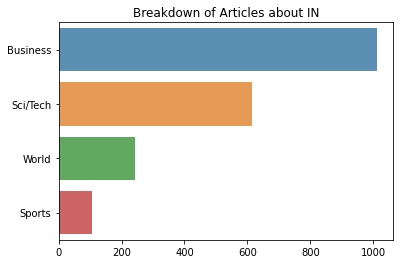

In [12]:
# in_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = in_total['news tag'].value_counts().index, x = in_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about IN')

## Sentiment Analysis

In [13]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(in_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

in_total['SA tag'] = SA_tag
in_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 1978/1978 [34:21<00:00,  1.04s/it]


In [14]:
in_total['SA tag'].value_counts()

POSITIVE    1298
NEGATIVE     680
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about IN')

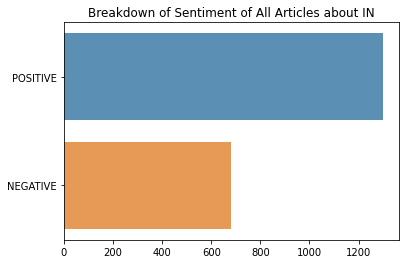

In [15]:
sns.barplot(y = in_total['SA tag'].value_counts().index, x = in_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about IN')

In [16]:
in_total.to_json('c4_reuters_IN_features_extracted.json')

# CN

## Categorise News Articles

In [17]:
cn_total = pd.read_json('c4_reuters_CN.json').reset_index(drop = True)

In [18]:
news_tag, news_tag_confid = [], []

for text in tqdm(cn_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

cn_total['news tag'] = news_tag
cn_total['news tag confidence'] = news_tag_confid

100%|██████████| 5480/5480 [01:57<00:00, 46.59it/s]


In [19]:
cn_total['news tag'].value_counts()

Business    3052
Sci/Tech    1790
World        520
Sports       118
Name: news tag, dtype: int64

In [20]:
focus_tags = cn_total['news tag'].value_counts()['World'] + cn_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 3572


Text(0.5, 1.0, 'Breakdown of Articles about CN')

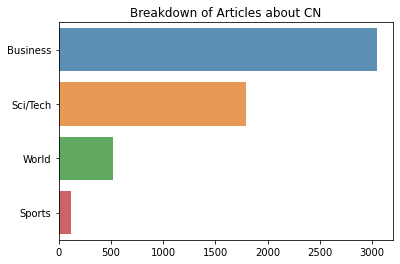

In [21]:
# cn_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = cn_total['news tag'].value_counts().index, x = cn_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about CN')

## Sentiment Analysis

In [22]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(cn_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

cn_total['SA tag'] = SA_tag
cn_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 5480/5480 [3:01:24<00:00,  1.99s/it]


In [23]:
cn_total['SA tag'].value_counts()

POSITIVE    3592
NEGATIVE    1888
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about CN')

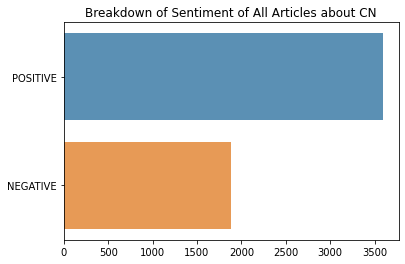

In [24]:
sns.barplot(y = cn_total['SA tag'].value_counts().index, x = cn_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about CN')

In [25]:
cn_total.to_json('c4_reuters_CN_features_extracted.json')

# Japan

## Categorise News Articles

In [26]:
jp_total = pd.read_json('c4_reuters_JP.json').reset_index(drop = True)

In [27]:
news_tag, news_tag_confid = [], []

for text in tqdm(jp_total['text']):
    result = classifier_pipe(text, padding=True, truncation=True)[0]
    news_tag.append(result['label'])
    news_tag_confid.append(result['score'])

jp_total['news tag'] = news_tag
jp_total['news tag confidence'] = news_tag_confid

100%|██████████| 2223/2223 [00:36<00:00, 61.15it/s]


In [28]:
jp_total['news tag'].value_counts()

Business    1126
Sci/Tech     767
Sports       177
World        153
Name: news tag, dtype: int64

In [29]:
focus_tags = jp_total['news tag'].value_counts()['World'] + jp_total['news tag'].value_counts()['Business']
print("Number of articles with tags of interest: {}".format(focus_tags))

Number of articles with tags of interest: 1279


Text(0.5, 1.0, 'Breakdown of Articles about JP')

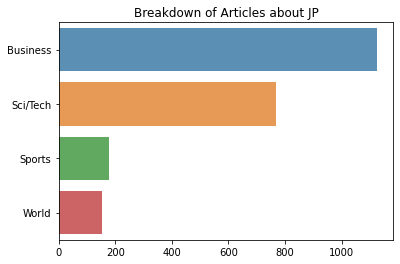

In [30]:
# jp_total['news tag'].value_counts().plot(kind = 'bar')
sns.barplot(y = jp_total['news tag'].value_counts().index, x = jp_total['news tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Articles about JP')

## Sentiment Analysis

In [31]:
SA_tag, SA_tag_confid = [], []

for text in tqdm(jp_total['text']):
    result = sentiment_analyser(text, padding=True, truncation=True)[0]
    SA_tag.append(result['label'])
    SA_tag_confid.append(result['score'])

jp_total['SA tag'] = SA_tag
jp_total['SA tag confidence'] = SA_tag_confid

100%|██████████| 2223/2223 [32:18<00:00,  1.15it/s]


In [32]:
jp_total['SA tag'].value_counts()

POSITIVE    1448
NEGATIVE     775
Name: SA tag, dtype: int64

Text(0.5, 1.0, 'Breakdown of Sentiment of All Articles about JP')

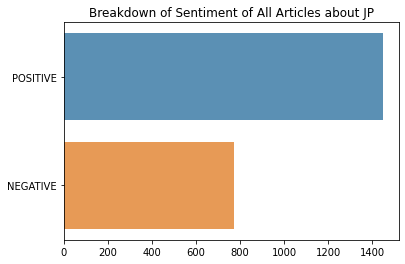

In [33]:
sns.barplot(y = jp_total['SA tag'].value_counts().index, x = jp_total['SA tag'].value_counts().values, alpha=0.8)
plt.title('Breakdown of Sentiment of All Articles about JP')

In [34]:
jp_total.to_json('c4_reuters_JP_features_extracted.json')

# Extract features for all 11 SEA countries

In [36]:
countries_of_interest = ['ID', 'LA', 'MM', 'BN', 'KH', 'TL', 'MY', 'SG', 'PH', 'TH', 'VN' ]

for country in countries_of_interest:
    tmp = pd.read_json('c4_reuters_{}.json'.format(country)).reset_index(drop = True)

    # Tagging of news articles
    news_tag, news_tag_confid = [], []

    for text in tqdm(tmp['text']):
        result = classifier_pipe(text, padding=True, truncation=True)[0]
        news_tag.append(result['label'])
        news_tag_confid.append(result['score'])

    tmp['news tag'] = news_tag
    tmp['news tag confidence'] = news_tag_confid

    # Sentiment analysis of articles
    SA_tag, SA_tag_confid = [], []

    for text in tqdm(tmp['text']):
        result = sentiment_analyser(text, padding=True, truncation=True)[0]
        SA_tag.append(result['label'])
        SA_tag_confid.append(result['score'])

    tmp['SA tag'] = SA_tag
    tmp['SA tag confidence'] = SA_tag_confid

    tmp.to_json('c4_reuters_{}_features_extracted.json'.format(country))

100%|██████████| 195/195 [03:09<00:00,  1.03it/s]
